# Exploring the datasets

In [1]:
import pandas as pd
import pyarrow.feather as feather
%matplotlib inline

In [37]:
def get_cols(df, stem):
    return [col for col in list(df) if stem in col]

## Strongbridge

In [64]:
file ="F:\\Valentina\\Experiments\\exp_lookback\\extra_data\\5_combined_train_unmatched_test_capped_freq_datediff.feather"

In [65]:
df_st = feather.read_feather(file)

In [67]:
#correction to the flatfile: cols starting with S are in months (all the rest is in days)
wrong_cols = [col for col in list(df_st) if ('LAST_EXP' in col and col.startswith('S_')) ]

In [72]:
for col in wrong_cols:
    df_st[col] = df_st[col].apply(lambda x: x*30)

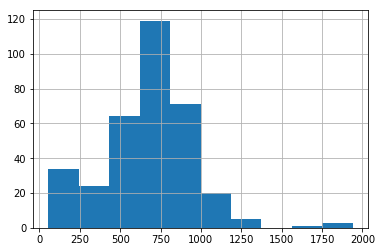

In [73]:
#few columns have last_exp_, the others last_exp_dt
last_cols = get_cols(df_st, 'LAST_EXP')

df_st[last_cols].median().hist()

In [74]:
print(len(last_cols),len(last_cols)/len(list(df_st)))

341 0.33074684772065954


In [42]:
#the peak of the distribution is 2 years for the last expsoure date
print(750/365)
#basically no last expsoure dates before 3.5 yrs
print(1250/365)

2.0547945205479454
3.4246575342465753


In [75]:
median_pos = df_st[df_st["label"] == 1][last_cols].median()
median_neg = df_st[df_st["label"] == 0][last_cols].median()

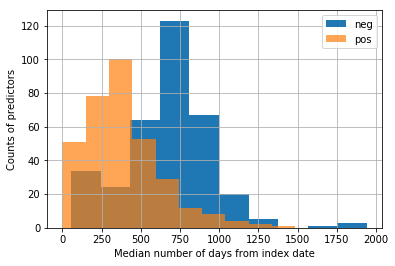

In [76]:
ax = median_neg.hist(label = 'neg')
median_pos.hist(ax = ax, alpha = 0.7, label = 'pos')
ax.set_xlabel('Median number of days from index date')
ax.set_ylabel('Counts of predictors')
ax.legend()

In [33]:
df_st['label'].value_counts()

0.0    1628335
1.0       1553
Name: label, dtype: int64

In [77]:
df_st.to_feather("F:\\Valentina\\Experiments\\exp_lookback\\extra_data\\st_combined_train_unmatched_test_capped_freq_datediff_alldays.feather")

In [78]:
del df_st

## Abbvie

In [29]:
file_abb = "F:\\Projects\\AbbVie_SCLC\\data\\modelling_data\\03_training_reduced_features.csv"

In [30]:
df_abb = pd.read_csv(file_abb)

In [98]:
last_cols = get_cols(df_abb, 'LAST_EXP')

In [51]:
print(len(last_cols),len(last_cols)/len(list(df_abb)))

17 0.19318181818181818


In [58]:
df_abb['OUTCOME'].value_counts()

0    3377
1    1665
Name: OUTCOME, dtype: int64

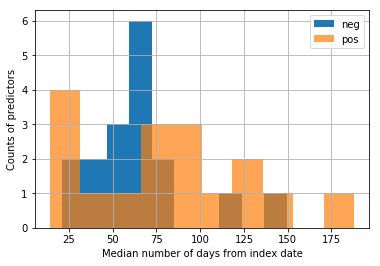

In [99]:
median_pos = df_abb[df_abb["OUTCOME"] == 1][last_cols].median()
median_neg = df_abb[df_abb["OUTCOME"] == 0][last_cols].median()
ax = median_neg.hist(label = 'neg')
median_pos.hist(ax = ax, alpha = 0.7, label = 'pos')
ax.set_xlabel('Median number of days from index date')
ax.set_ylabel('Counts of predictors')
ax.legend()

## Biogen

Special case, focus on the rest before. ASK: Which is the label?

In [79]:
file_bio = "F:\\Valentina\\Experiments\\exp_lookback\\extra_data\\biogen_data_model_3_for_HP_search.feather"

In [80]:
df_bio = feather.read_feather(file_bio)

In [83]:
last_cols = get_cols(df_bio, "diff")

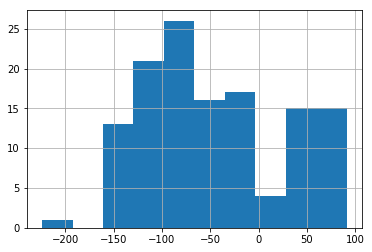

In [88]:
#negative date differences because we look at information before and after 
#(the index date is the date a certain drug has been prescribed, we want to predict 
#if 90 days after the patient will be still using that drug)
df_bio[last_cols].median().hist()